In [1]:
# SpaceML: 3D Coordinate Transformations for Spacecraft Navigation
# ================================================================
# Foundation module for the SpaceML library
# Building from 2D insights: matrix columns = where basis vectors land
# Vector addition = cumulative displacement in space

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as patches
from scipy.spatial.transform import Rotation
import warnings
warnings.filterwarnings('ignore')

In [4]:
# ============================================================================
# PART 1: 3D ROTATION THEORY - EXTENDING YOUR 2D INSIGHTS
# ============================================================================

class SpaceML3D:
    """
    SpaceML 3D Coordinate Transformation Library
    
    Building on the key insights from 2D:
    1. Matrix columns show where basis vectors land after transformation
    2. Vector components scale the new basis vectors
    3. Vector addition represents cumulative displacement
    """
    
    @staticmethod
    def rotation_matrix_x(angle_deg):
        """
        Create rotation matrix around X-axis (Roll in spacecraft terms)
        
        Insight: Same as 2D rotation, but Y and Z coordinates rotate
        while X stays fixed
        
        Args:
            angle_deg: Rotation angle in degrees
            
        Returns:
            3x3 numpy array representing rotation matrix
        """
        theta = np.radians(angle_deg)
        return np.array([
            [1, 0, 0],
            [0, np.cos(theta), -np.sin(theta)],
            [0, np.sin(theta), np.cos(theta)]
        ])
    
    @staticmethod
    def rotation_matrix_y(angle_deg):
        """
        Create rotation matrix around Y-axis (Pitch in spacecraft terms)
        
        Insight: X and Z coordinates rotate, Y stays fixed
        Note the sign difference - right-hand rule!
        
        Args:
            angle_deg: Rotation angle in degrees
            
        Returns:
            3x3 numpy array representing rotation matrix
        """
        theta = np.radians(angle_deg)
        return np.array([
            [np.cos(theta), 0, np.sin(theta)],
            [0, 1, 0],
            [-np.sin(theta), 0, np.cos(theta)]
        ])
    
    @staticmethod
    def rotation_matrix_z(angle_deg):
        """
        Create rotation matrix around Z-axis (Yaw in spacecraft terms)
        
        Insight: This is exactly our 2D rotation matrix with Z unchanged!
        X and Y coordinates rotate, Z stays fixed
        
        Args:
            angle_deg: Rotation angle in degrees
            
        Returns:
            3x3 numpy array representing rotation matrix
        """
        theta = np.radians(angle_deg)
        return np.array([
            [np.cos(theta), -np.sin(theta), 0],
            [np.sin(theta), np.cos(theta), 0],
            [0, 0, 1]
        ])
    
    @staticmethod
    def euler_to_rotation_matrix(roll_deg, pitch_deg, yaw_deg, sequence='XYZ'):
        """
        Convert Euler angles to rotation matrix
        
        Insight: Combining rotations = matrix multiplication
        The order matters! Different sequences give different results
        
        Args:
            roll_deg: Rotation around X-axis (degrees)
            pitch_deg: Rotation around Y-axis (degrees) 
            yaw_deg: Rotation around Z-axis (degrees)
            sequence: Order of rotations ('XYZ', 'ZYX', etc.)
            
        Returns:
            3x3 rotation matrix
        """
        Rx = SpaceML3D.rotation_matrix_x(roll_deg)
        Ry = SpaceML3D.rotation_matrix_y(pitch_deg)
        Rz = SpaceML3D.rotation_matrix_z(yaw_deg)
        
        if sequence == 'XYZ':
            return Rz @ Ry @ Rx  # Applied in order: X, then Y, then Z
        elif sequence == 'ZYX':
            return Rx @ Ry @ Rz  # Applied in order: Z, then Y, then X
        else:
            raise ValueError(f"Sequence {sequence} not implemented")
    
    @staticmethod
    def eci_to_ecef_matrix(greenwich_hour_angle_deg):
        """
        Create transformation matrix from ECI to ECEF coordinates
        
        Real spacecraft application: Convert from inertial frame
        (fixed to stars) to Earth-fixed frame (rotating with Earth)
        
        Args:
            greenwich_hour_angle_deg: Earth rotation angle
            
        Returns:
            3x3 transformation matrix
        """
        # Earth rotates around Z-axis
        return SpaceML3D.rotation_matrix_z(-greenwich_hour_angle_deg)
    
    @staticmethod
    def visualize_coordinate_frames(roll=0, pitch=0, yaw=0):
        """
        Visualize original and transformed coordinate frames
        
        This shows your key insight: matrix columns are where basis vectors land!
        """
        fig = plt.figure(figsize=(12, 5))
        
        # Original coordinate frame
        ax1 = fig.add_subplot(121, projection='3d')
        
        # Original basis vectors
        origin = np.zeros(3)
        i_hat = np.array([1, 0, 0])
        j_hat = np.array([0, 1, 0])
        k_hat = np.array([0, 0, 1])
        
        ax1.quiver(*origin, *i_hat, color='red', arrow_length_ratio=0.1, linewidth=3, label="î (X)")
        ax1.quiver(*origin, *j_hat, color='green', arrow_length_ratio=0.1, linewidth=3, label="ĵ (Y)")
        ax1.quiver(*origin, *k_hat, color='blue', arrow_length_ratio=0.1, linewidth=3, label="k̂ (Z)")
        
        ax1.set_xlim([-1.5, 1.5])
        ax1.set_ylim([-1.5, 1.5])
        ax1.set_zlim([-1.5, 1.5])
        ax1.set_title("Original Coordinate Frame")
        ax1.legend()
        
        # Transformed coordinate frame
        ax2 = fig.add_subplot(122, projection='3d')
        
        # Create rotation matrix
        R = SpaceML3D.euler_to_rotation_matrix(roll, pitch, yaw)
        
        # Transform basis vectors (this is where your insight shines!)
        i_hat_new = R @ i_hat  # Column 1 of R
        j_hat_new = R @ j_hat  # Column 2 of R  
        k_hat_new = R @ k_hat  # Column 3 of R
        
        # Original (faded)
        ax2.quiver(*origin, *i_hat, color='red', alpha=0.3, arrow_length_ratio=0.1, linewidth=2)
        ax2.quiver(*origin, *j_hat, color='green', alpha=0.3, arrow_length_ratio=0.1, linewidth=2)
        ax2.quiver(*origin, *k_hat, color='blue', alpha=0.3, arrow_length_ratio=0.1, linewidth=2)
        
        # Transformed (bright)
        ax2.quiver(*origin, *i_hat_new, color='red', arrow_length_ratio=0.1, linewidth=3, label="î' (X')")
        ax2.quiver(*origin, *j_hat_new, color='green', arrow_length_ratio=0.1, linewidth=3, label="ĵ' (Y')")
        ax2.quiver(*origin, *k_hat_new, color='blue', arrow_length_ratio=0.1, linewidth=3, label="k̂' (Z')")
        
        ax2.set_xlim([-1.5, 1.5])
        ax2.set_ylim([-1.5, 1.5])
        ax2.set_zlim([-1.5, 1.5])
        ax2.set_title(f"Rotated Frame (R={roll}°, P={pitch}°, Y={yaw}°)")
        ax2.legend()
        
        plt.tight_layout()
        plt.show()
        
        # Print the matrix to see the connection!
        print("Rotation Matrix R:")
        print(R)
        print(f"\nColumn 1 (where î lands): [{i_hat_new[0]:.3f}, {i_hat_new[1]:.3f}, {i_hat_new[2]:.3f}]")
        print(f"Column 2 (where ĵ lands): [{j_hat_new[0]:.3f}, {j_hat_new[1]:.3f}, {j_hat_new[2]:.3f}]")
        print(f"Column 3 (where k̂ lands): [{k_hat_new[0]:.3f}, {k_hat_new[1]:.3f}, {k_hat_new[2]:.3f}]")


In [5]:
# ============================================================================
# PART 2: SPACECRAFT COORDINATE SYSTEMS
# ============================================================================

class SpacecraftCoordinates:
    """
    Real spacecraft coordinate system transformations
    
    Implementing the coordinate frames you learned about:
    - ECI: Earth-Centered Inertial (fixed to stars)
    - ECEF: Earth-Centered Earth-Fixed (rotates with Earth)
    - Body: Spacecraft body-fixed frame
    """
    
    def __init__(self):
        self.earth_rotation_rate = 15.04  # degrees per hour
    
    def eci_to_ecef(self, eci_position, time_hours):
        """
        Transform from ECI to ECEF coordinates
        
        Args:
            eci_position: [x, y, z] position in ECI frame (km)
            time_hours: Time since reference epoch (hours)
            
        Returns:
            ECEF position [x, y, z] (km)
        """
        # Earth rotation angle
        gha = self.earth_rotation_rate * time_hours
        
        # Transformation matrix
        R_eci_to_ecef = SpaceML3D.eci_to_ecef_matrix(gha)
        
        # Apply transformation (your vector scaling insight in action!)
        ecef_position = R_eci_to_ecef @ eci_position
        
        return ecef_position
    
    def satellite_position_demo(self):
        """
        Demonstrate satellite position in different coordinate frames
        """
        # Satellite position in ECI (km) - roughly ISS altitude
        sat_eci = np.array([6700, 0, 0])  # On equator, 0° longitude at t=0
        
        print("Satellite Position Demonstration")
        print("=" * 40)
        print(f"Initial ECI position: [{sat_eci[0]:.0f}, {sat_eci[1]:.0f}, {sat_eci[2]:.0f}] km")
        print()
        
        # Show position at different times as Earth rotates
        times = [0, 1, 2, 3, 6, 12]  # hours
        
        for t in times:
            ecef_pos = self.eci_to_ecef(sat_eci, t)
            print(f"After {t:2d} hours:")
            print(f"  ECI:  [{sat_eci[0]:7.0f}, {sat_eci[1]:7.0f}, {sat_eci[2]:7.0f}] km (unchanged)")
            print(f"  ECEF: [{ecef_pos[0]:7.0f}, {ecef_pos[1]:7.0f}, {ecef_pos[2]:7.0f}] km (Earth rotated)")
            
            # Calculate longitude for context
            longitude = np.degrees(np.arctan2(ecef_pos[1], ecef_pos[0]))
            print(f"  Longitude: {longitude:7.1f}°")
            print()



In [6]:
# ============================================================================
# PART 3: HANDS-ON EXERCISES
# ============================================================================

def exercise_1_basic_rotations():
    """
    Exercise 1: Understanding 3D rotations
    """
    print("EXERCISE 1: Basic 3D Rotations")
    print("=" * 50)
    
    # Create a test vector
    test_vector = np.array([1, 1, 1])
    print(f"Original vector: {test_vector}")
    print()
    
    # Apply different rotations
    angles = [30, 60, 90]
    
    for angle in angles:
        print(f"Rotating by {angle}° around each axis:")
        
        # X-axis rotation
        Rx = SpaceML3D.rotation_matrix_x(angle)
        rotated_x = Rx @ test_vector
        print(f"  X-axis: {rotated_x}")
        
        # Y-axis rotation  
        Ry = SpaceML3D.rotation_matrix_y(angle)
        rotated_y = Ry @ test_vector
        print(f"  Y-axis: {rotated_y}")
        
        # Z-axis rotation
        Rz = SpaceML3D.rotation_matrix_z(angle)
        rotated_z = Rz @ test_vector
        print(f"  Z-axis: {rotated_z}")
        print()

def exercise_2_matrix_columns():
    """
    Exercise 2: Verify your insight about matrix columns
    """
    print("EXERCISE 2: Matrix Columns = Transformed Basis Vectors")
    print("=" * 60)
    
    # Create a rotation matrix
    roll, pitch, yaw = 30, 45, 60
    R = SpaceML3D.euler_to_rotation_matrix(roll, pitch, yaw)
    
    print(f"Rotation matrix for Roll={roll}°, Pitch={pitch}°, Yaw={yaw}°:")
    print(R)
    print()
    
    # Original basis vectors
    i_hat = np.array([1, 0, 0])
    j_hat = np.array([0, 1, 0]) 
    k_hat = np.array([0, 0, 1])
    
    # Transform basis vectors
    i_transformed = R @ i_hat
    j_transformed = R @ j_hat
    k_transformed = R @ k_hat
    
    print("Transformed basis vectors:")
    print(f"R @ î = {i_transformed} = Column 1 of R: {R[:, 0]}")
    print(f"R @ ĵ = {j_transformed} = Column 2 of R: {R[:, 1]}")
    print(f"R @ k̂ = {k_transformed} = Column 3 of R: {R[:, 2]}")
    print()
    
    # Verify they match
    print("Verification (should be True):")
    print(f"Column 1 matches: {np.allclose(i_transformed, R[:, 0])}")
    print(f"Column 2 matches: {np.allclose(j_transformed, R[:, 1])}")
    print(f"Column 3 matches: {np.allclose(k_transformed, R[:, 2])}")

def exercise_3_vector_addition():
    """
    Exercise 3: Vector addition in 3D (your breakthrough insight!)
    """
    print("EXERCISE 3: Vector Addition in 3D")
    print("=" * 40)
    
    # Test vector
    vector = np.array([2, 1, 3])
    print(f"Test vector: {vector}")
    print(f"Meaning: 2 steps in î direction + 1 step in ĵ direction + 3 steps in k̂ direction")
    print()
    
    # Create rotation
    R = SpaceML3D.rotation_matrix_z(45)  # Simple Z rotation
    
    # Method 1: Direct matrix multiplication
    result_direct = R @ vector
    
    # Method 2: Your insight - scale transformed basis vectors and add
    i_new = R[:, 0]  # Where î lands
    j_new = R[:, 1]  # Where ĵ lands  
    k_new = R[:, 2]  # Where k̂ lands
    
    result_addition = vector[0] * i_new + vector[1] * j_new + vector[2] * k_new
    
    print("Two methods (should give same result):")
    print(f"Direct multiplication:  {result_direct}")
    print(f"Vector addition:        {result_addition}")
    print(f"Methods match: {np.allclose(result_direct, result_addition)}")
    print()
    
    print("Breaking down the vector addition:")
    print(f"2 × î' = 2 × {i_new} = {2 * i_new}")
    print(f"1 × ĵ' = 1 × {j_new} = {1 * j_new}")  
    print(f"3 × k̂' = 3 × {k_new} = {3 * k_new}")
    print(f"Sum = {2 * i_new + 1 * j_new + 3 * k_new}")

In [7]:
# ============================================================================
# PART 4: SPACECRAFT APPLICATIONS
# ============================================================================

def spacecraft_attitude_demo():
    """
    Demonstrate real spacecraft attitude control scenario
    """
    print("SPACECRAFT ATTITUDE CONTROL DEMO")
    print("=" * 50)
    
    # Initial spacecraft attitude (aligned with reference frame)
    initial_attitude = np.eye(3)
    print("Initial spacecraft attitude matrix (identity = aligned):")
    print(initial_attitude)
    print()
    
    # Target direction for antenna pointing (in reference frame)
    target_direction = np.array([0.707, 0.707, 0])  # 45° from X towards Y
    print(f"Target direction (reference frame): {target_direction}")
    print()
    
    # Spacecraft executes attitude maneuver
    roll, pitch, yaw = 0, 0, 45  # Yaw 45° to align
    attitude_matrix = SpaceML3D.euler_to_rotation_matrix(roll, pitch, yaw)
    
    print(f"Attitude maneuver: Yaw {yaw}° (rotate around Z-axis)")
    print("New attitude matrix:")
    print(attitude_matrix)
    print()
    
    # Antenna direction in spacecraft frame (always points "forward" = X-axis)
    antenna_spacecraft = np.array([1, 0, 0])
    
    # Transform to reference frame
    antenna_reference = attitude_matrix @ antenna_spacecraft
    
    print("Antenna pointing:")
    print(f"  Spacecraft frame: {antenna_spacecraft} (always forward)")
    print(f"  Reference frame:  {antenna_reference}")
    print(f"  Target direction: {target_direction}")
    print(f"  Pointing error:   {np.linalg.norm(antenna_reference - target_direction):.6f}")




SpaceML 3D Coordinate Transformations
Building on your 2D insights for spacecraft navigation

EXERCISE 1: Basic 3D Rotations
Original vector: [1 1 1]

Rotating by 30° around each axis:
  X-axis: [1.        0.3660254 1.3660254]
  Y-axis: [1.3660254 1.        0.3660254]
  Z-axis: [0.3660254 1.3660254 1.       ]

Rotating by 60° around each axis:
  X-axis: [ 1.        -0.3660254  1.3660254]
  Y-axis: [ 1.3660254  1.        -0.3660254]
  Z-axis: [-0.3660254  1.3660254  1.       ]

Rotating by 90° around each axis:
  X-axis: [ 1. -1.  1.]
  Y-axis: [ 1.  1. -1.]
  Z-axis: [-1.  1.  1.]



EXERCISE 2: Matrix Columns = Transformed Basis Vectors
Rotation matrix for Roll=30°, Pitch=45°, Yaw=60°:
[[ 0.35355339 -0.5732233   0.73919892]
 [ 0.61237244  0.73919892  0.28033009]
 [-0.70710678  0.35355339  0.61237244]]

Transformed basis vectors:
R @ î = [ 0.35355339  0.61237244 -0.70710678] = Column 1 of R: [ 0.35355339  0.61237244 -0.70710678]
R @ ĵ = [-0.5732233   0.73919892  0.35355339] = Column 2 

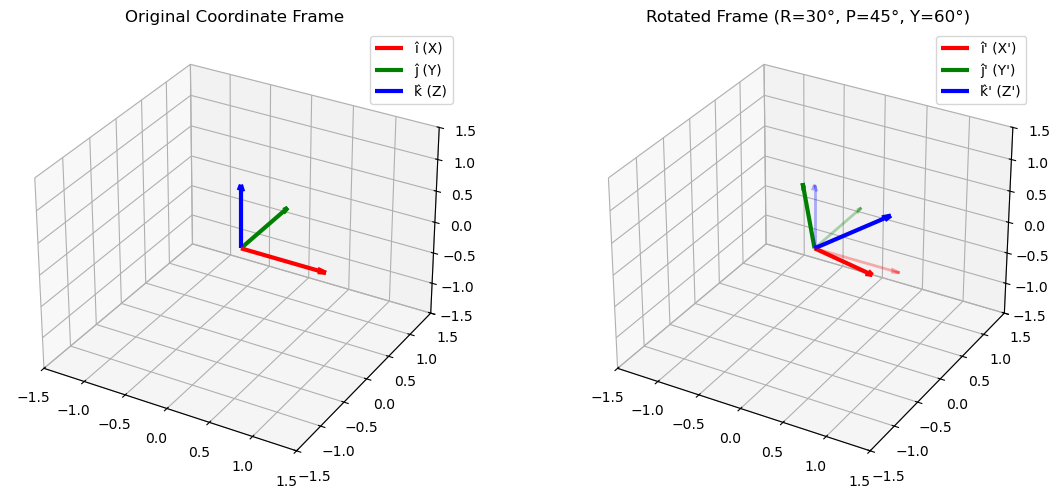

Rotation Matrix R:
[[ 0.35355339 -0.5732233   0.73919892]
 [ 0.61237244  0.73919892  0.28033009]
 [-0.70710678  0.35355339  0.61237244]]

Column 1 (where î lands): [0.354, 0.612, -0.707]
Column 2 (where ĵ lands): [-0.573, 0.739, 0.354]
Column 3 (where k̂ lands): [0.739, 0.280, 0.612]

🚀 SpaceML Foundation Complete!
Ready to extend with attitude determination algorithms...


In [8]:
# ============================================================================
# MAIN EXECUTION
# ============================================================================

if __name__ == "__main__":
    print("SpaceML 3D Coordinate Transformations")
    print("=====================================")
    print("Building on your 2D insights for spacecraft navigation\n")
    
    # Create instances
    spaceml = SpaceML3D()
    spacecraft = SpacecraftCoordinates()
    
    # Run exercises
    exercise_1_basic_rotations()
    print("\n" + "="*70 + "\n")
    
    exercise_2_matrix_columns()
    print("\n" + "="*70 + "\n")
    
    exercise_3_vector_addition()
    print("\n" + "="*70 + "\n")
    
    spacecraft_attitude_demo()
    print("\n" + "="*70 + "\n")
    
    # Coordinate system demo
    spacecraft.satellite_position_demo()
    print("\n" + "="*70 + "\n")
    
    # Visualization (comment out if running without display)
    print("Generating 3D visualization...")
    try:
        SpaceML3D.visualize_coordinate_frames(30, 45, 60)
    except:
        print("Visualization requires display - run in Jupyter notebook for best results")
    
    print("\n🚀 SpaceML Foundation Complete!")
    print("Ready to extend with attitude determination algorithms...")

In [9]:
# =============================================================================
# CELL 10: INTERACTIVE TESTING & VISUALIZATION
# =============================================================================

# Test individual components and create visualizations
print("🚀 SpaceML 3D Transformations Ready!")
print("Run the exercises above to verify your 2D insights extend to 3D!")
print("\n" + "="*50)
print("Next: Implement QUEST algorithm for spacecraft attitude determination")
print("="*50)

🚀 SpaceML 3D Transformations Ready!
Run the exercises above to verify your 2D insights extend to 3D!

Next: Implement QUEST algorithm for spacecraft attitude determination
